In [1]:
import os
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipynb.fs.full.pretraitement import *
from ipynb.fs.full.Extraction import *
import csv

In [164]:
data_dire = 'dataset'
Classes = ['classe 0', 'classe 1', 'classe 2', 'classe 3', 'classe 4' , 'classe 5', 'classe 6', 'classe 7', 'classe 8', 'classe 9']

header = ["phi0", "phi1", "phi2", "phi3", "phi4", "phi5", "phi6","classe"]
data = []
data2 = []
for classe in Classes:
    class_num = Classes.index(classe)
    path = os.path.join(data_dire, classe)
    for img in os.listdir(path):
        img = cv.imread(os.path.join(path, img),0)
        img_bin = IMAGE_BIN (img)
        img_resize = resize(img_bin)
        momentHU(img_bin, class_num)
        data.append(momentHU(img_bin, class_num))

In [3]:
with open('numbers.csv', 'w', encoding='UTF8', newline='') as f:
            writer = csv.writer(f)
            # write the header
            writer.writerow(header)
            # write multiple rows
            writer.writerows(data)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [185]:
data = pd.read_csv("numbers.csv")
data

,phi0,phi1,phi2,phi3,phi4,phi5,phi6,classe
0,1.073741e-06,2.971326e-11,1.802183e-15,5.986776e-16,1.653600e-32,1.545063e-21,-7.442103e-31,0.0
1,-7.975035e-07,1.096280e-11,1.721708e-17,1.490124e-16,-1.348653e-32,2.476004e-22,1.084656e-32,0.0
2,7.754815e-07,2.773352e-11,8.959879e-16,2.100564e-16,-8.934321e-32,4.025988e-22,-3.349150e-32,0.0
3,1.650554e-06,1.948070e-11,1.493559e-18,3.751338e-18,4.341305e-35,9.821881e-24,-1.274203e-35,0.0
4,1.200466e-06,1.722573e-11,3.589239e-16,2.533735e-18,-8.015343e-35,-5.816456e-24,2.060435e-35,0.0
...,...,...,...,...,...,...,...,...
95,6.468783e-06,8.214043e-11,2.200449e-14,2.130184e-14,6.404784e-28,1.519915e-19,-5.095622e-28,9.0
96,2.810488e-06,8.051830e-12,4.649217e-16,8.548272e-17,-3.288944e-33,2.182006e-22,-2.019328e-32,9.0
97,1.862030e-06,2.152441e-11,6.324359e-15,2.253818e-15,1.168147e-29,5.872693e-21,-6.538515e-30,9.0
98,1.579390e-06,2.045441e-11,7.699110e-15,7.059244e-15,9.777160e-29,1.816453e-20,6.757334e-29,9.0


In [188]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 9., 9., 9., 9., 9., 9., 9., 9., 9., 9.])

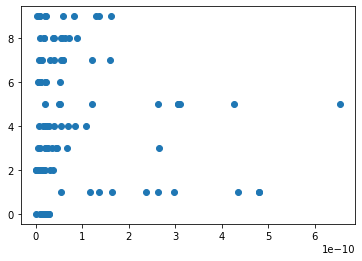

In [189]:
plt.scatter(data['phi1'], Y)
plt.show()

In [190]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [195]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [196]:
score = knn.score(X_test,Y_test)
print(f'taux de classification: {score*100}%')
print(f"taux d'erreur: {100-score*100}%")

taux de classification: 30.0%
taux d'erreur: 70.0%


In [131]:
Y_pred = knn.predict(X_test)
Y_pred

array([6., 0., 0., 0., 0., 8., 8., 1., 1., 1., 2., 4., 1., 4., 8., 8., 4.,
       2., 4., 1.])

In [132]:
Y_test

array([8., 3., 7., 2., 5., 9., 5., 7., 1., 1., 2., 4., 9., 7., 7., 3., 5.,
       2., 4., 8.])